In [ ]:
"""plot each produce item's average price as a function of time, assuming that the joining command has already been run
added bonus - this script also selects by most common produce attributes, computes average price, and
saves only useful columns to "a new csv file (should make subsequent reads/saves much faster)
"""

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
concatenated_dir = './concat_data/'
save_dir = './trimmed_data_and_plots/'

In [16]:
# function that reads in an csv file of produce data
# sift by column in cols_to_possibly_sift_by if fraction of most common entry is greater than sift_threshold
# only save columns either a) used to sift by, b) in other_cols_to_save, c) the average price
def read_csv_sort(producename, cityname, cols_to_possibly_sift_by, sift_threshold, other_cols_to_save):
    input_data = pd.read_csv(concatenated_dir+str(cityname)+'_'+str(producename)+'_ALL.csv')
    # now loop over columns to possibly sift by according to threshold
    actually_sift = []
    for entry in cols_to_possibly_sift_by:
        try:
            freq_type = input_data[entry].value_counts().idxmax()
        except ValueError:
            break
        if input_data[input_data[entry]==freq_type][entry].count()/input_data['Commodity Name'].count() >= sift_threshold:
            actually_sift.append(entry)
            # select most common subtype
            input_data = input_data[input_data[entry]==freq_type]
    # now compute the average price information
    all_cols_to_save = other_cols_to_save + actually_sift + ['Low Price', 'High Price']
    # select only columns that I want to save
    output_data = input_data[all_cols_to_save]
    # define average price for each row
    output_data = pd.concat([output_data, ((output_data['Low Price']+output_data['High Price'])*0.5).rename('Average Price')], axis=1)
    # group by day and define daily average price, drop duplicate dates
    average_daily_price = output_data.groupby('Date', as_index=False)['Average Price'].mean()
    output_data = output_data.drop_duplicates(subset = ['Date']).drop('Average Price', axis=1)
    output_data = output_data.set_index('Date').join(average_daily_price.set_index('Date'))
    return output_data, actually_sift
        

In [17]:
def plot_save_produce(producedata, siftkeys):
    # plot average price as function of time, label with relevant data, save plot
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)

    producename = producedata['Commodity Name'][0]
    producecity = producedata['City Name'][0]
    
    graphtitle = producename + '_' + producecity
    for i in siftkeys:
        graphtitle = graphtitle + '_' + producedata[i][0]
    filetitle = producename + '_' + producecity
    datelist = pd.to_datetime(producedata.index)
    plot = plt.plot_date(datelist, producedata['Average Price'])

    plt.xlabel('Year', fontsize=14)
    plt.ylabel(producename, fontsize=14)
    plt.title(graphtitle)
    #plt.xlim(['06/01/2007', '12/28/2008'])

    plt.savefig(save_dir+filetitle+'.png', format='png', bbox_inches='tight')

In [18]:
cities = ['NEW+YORK', 'LOS+ANGELES']

veggies = ['APPLES','APRICOTS','ASPARAGUS','AVOCADOS','BANANAS','BEANS','BEETS','BLACKBERRIES','BLUEBERRIES','BROCCOLI','BRUSSELS+SPROUTS','CABBAGE','CANTALOUPS','CARROTS','CAULIFLOWER','CELERY','CHERRIES','CLEMENTINES','CORN-SWEET','CRANBERRIES', 'CUCUMBERS','EGGPLANT','ENDIVE','GARLIC','GINGER+ROOT','GRAPEFRUIT','GRAPES','HONEYDEWS','KIWIFRUIT','LEMONS','LETTUCE%2C+ICEBERG','LETTUCE%2C+ROMAINE','LETTUCE%2C+RED+LEAF','LETTUCE%2C+GREEN+LEAF', 'LIMES','MANGOES','MUSHROOMS','NECTARINES','OKRA','ORANGES','PEACHES','PEARS','PEAS+GREEN','PEPPERS%2C+BELL+TYPE','PINEAPPLES','PLUMS','POTATOES','PUMPKINS','RADISHES','RASPBERRIES','RHUBARB','SPINACH','SQUASH','STRAWBERRIES','SWEET+POTATOES','TOMATOES','TURNIPS','WATERMELONS']


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(cod

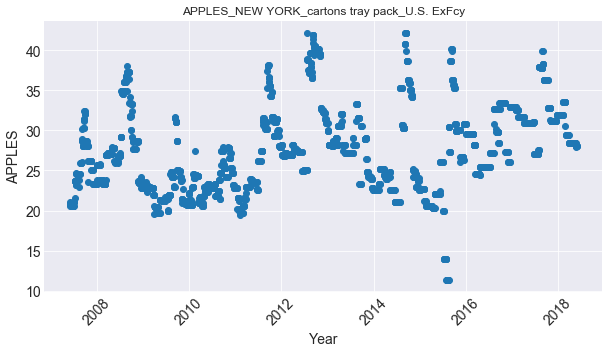

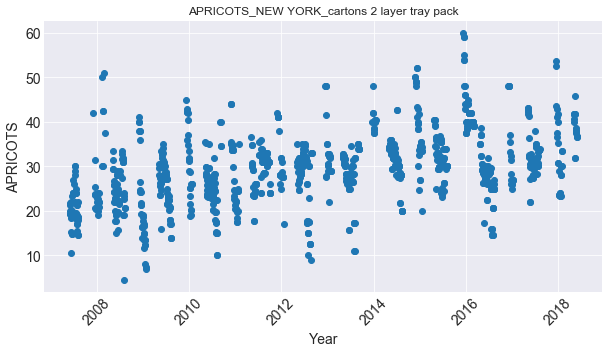

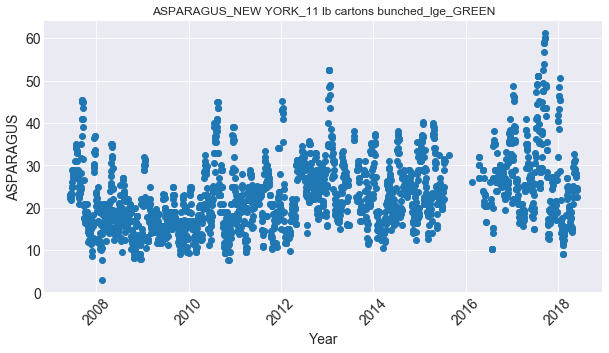

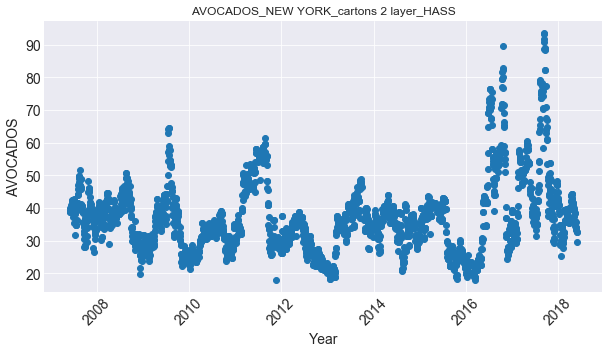

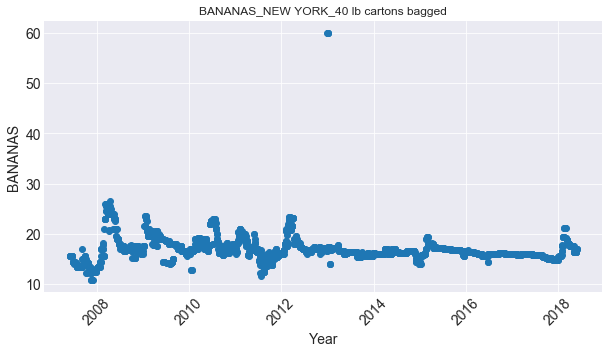

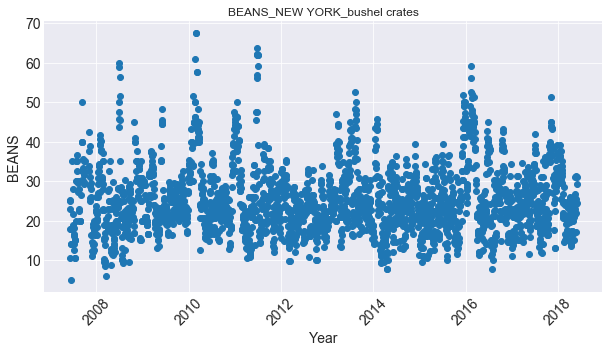

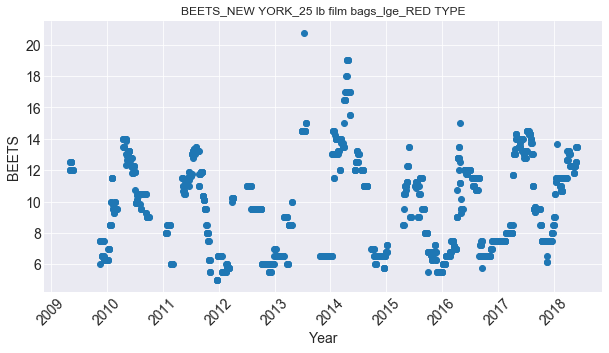

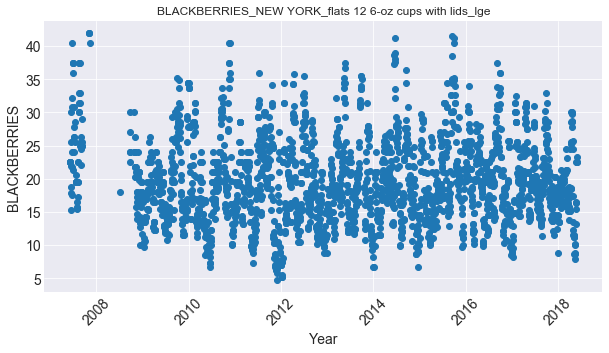

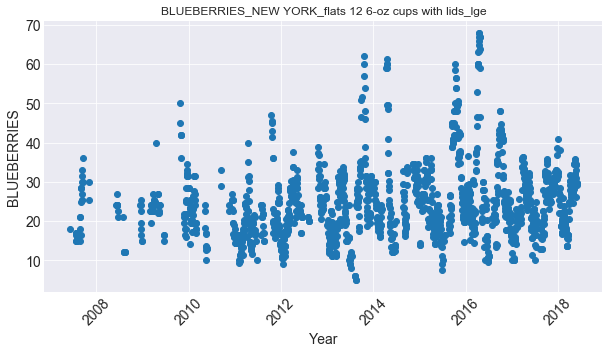

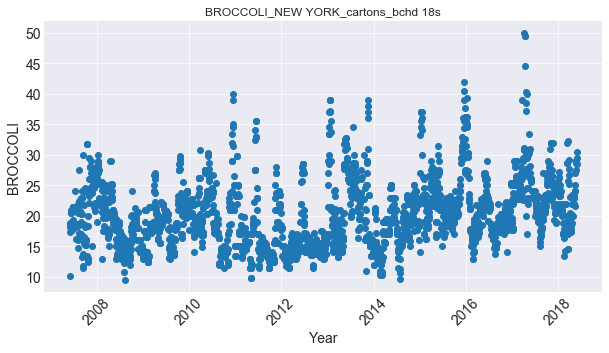

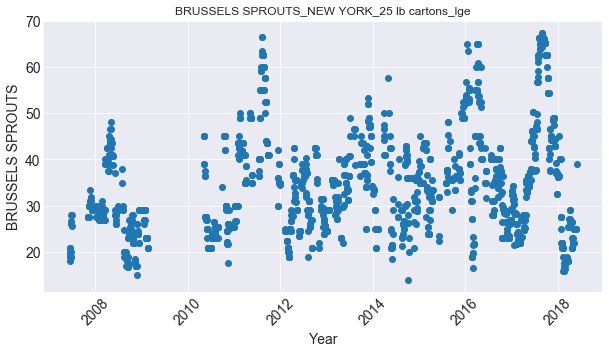

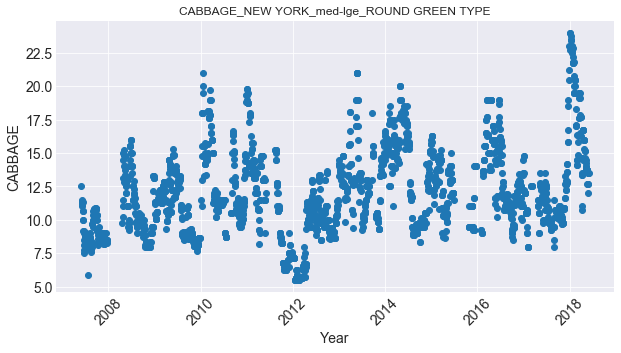

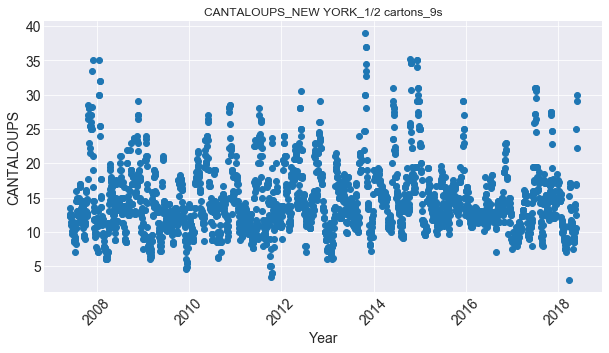

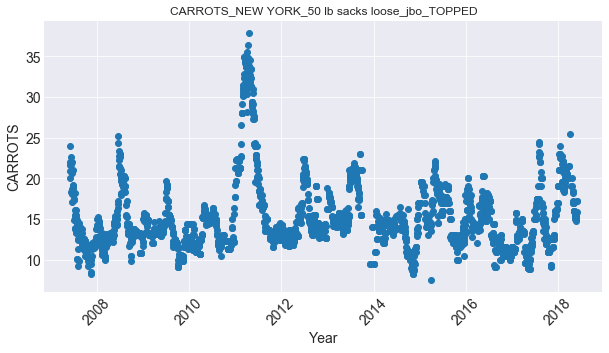

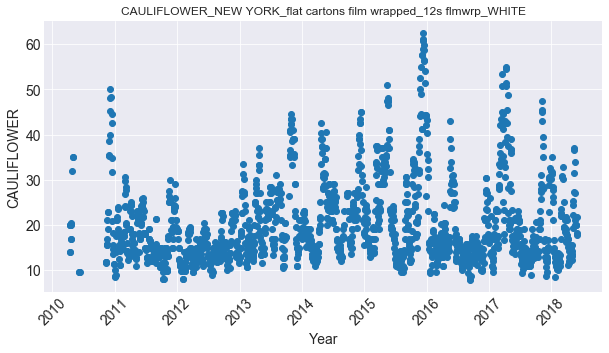

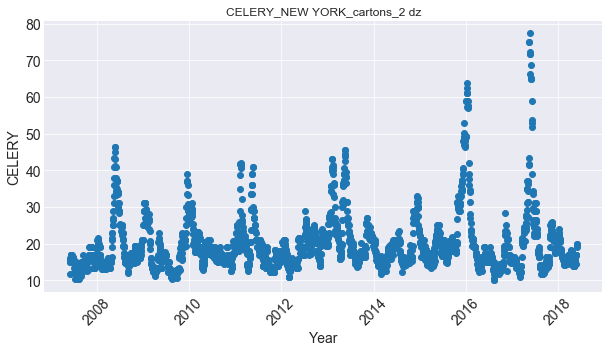

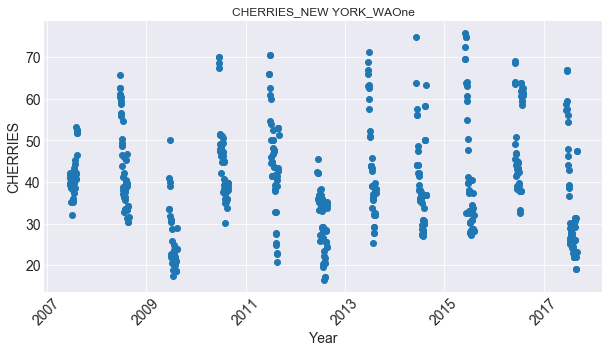

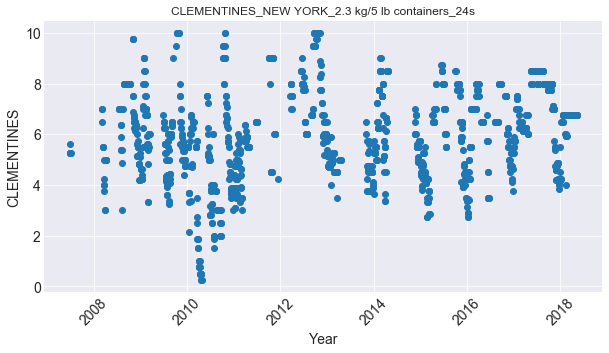

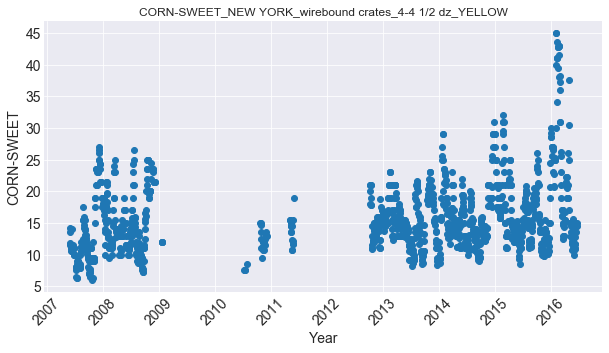

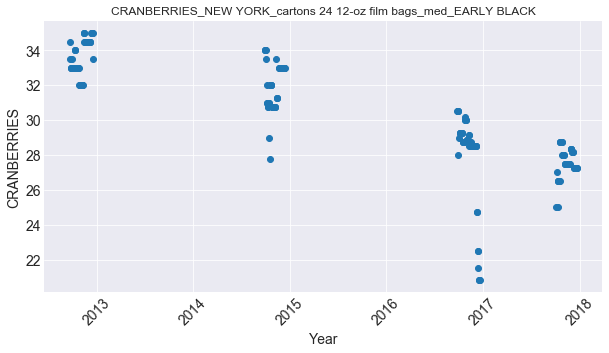

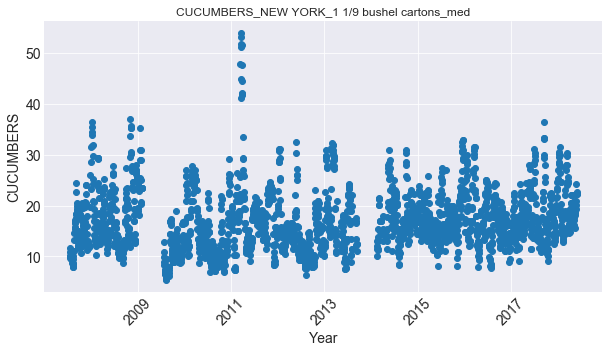

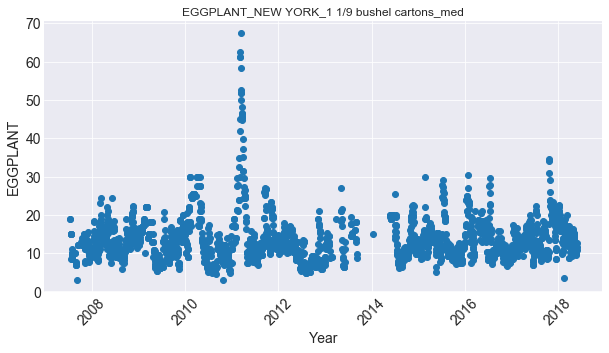

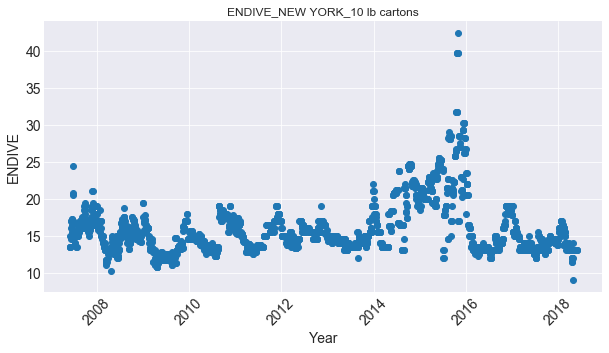

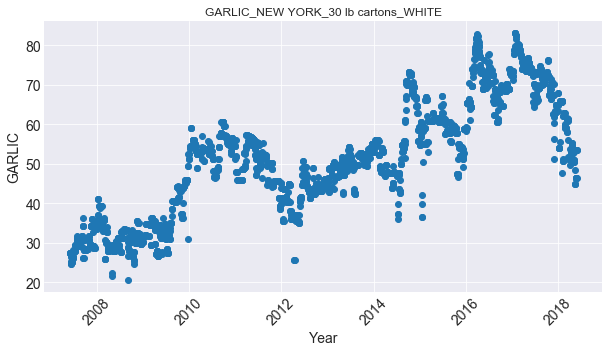

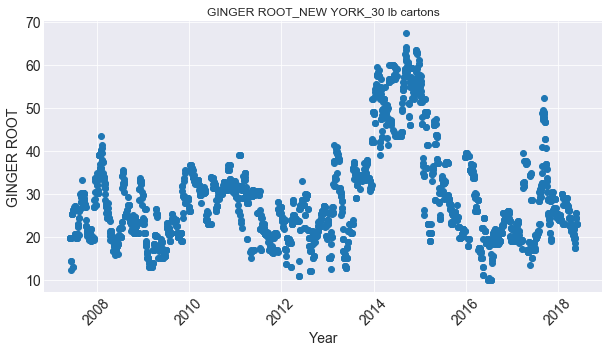

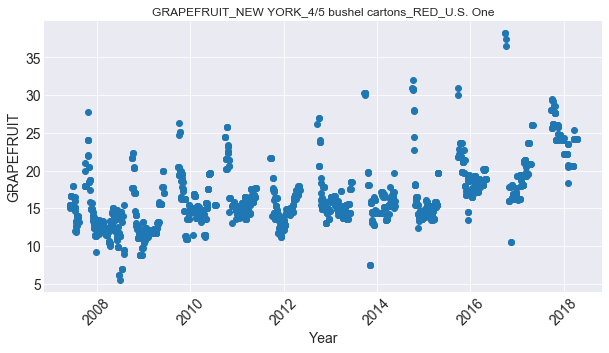

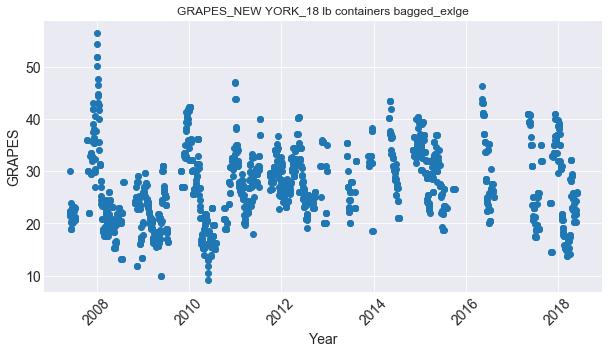

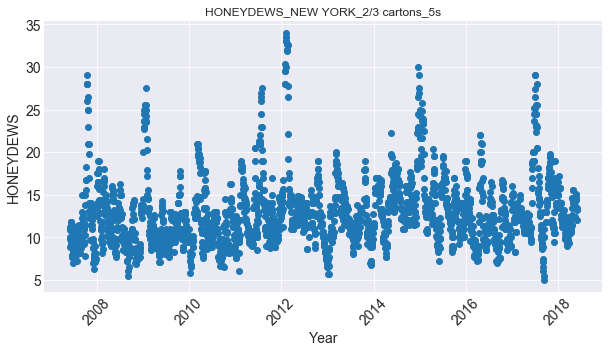

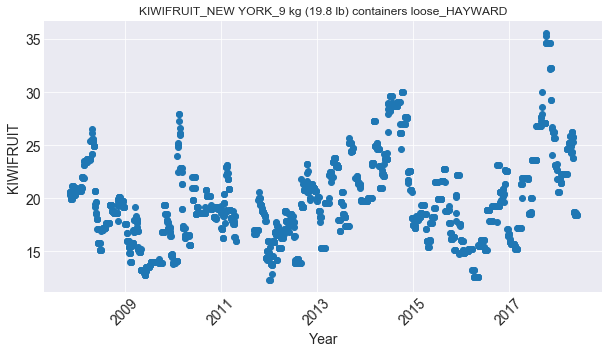

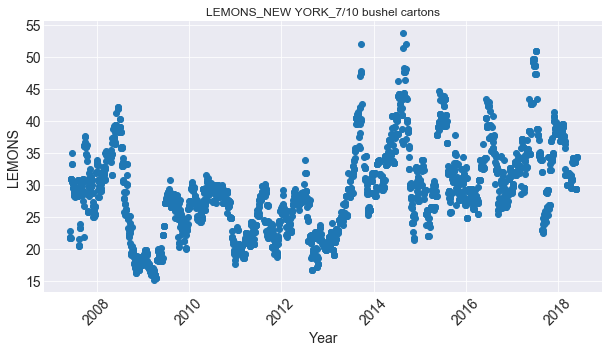

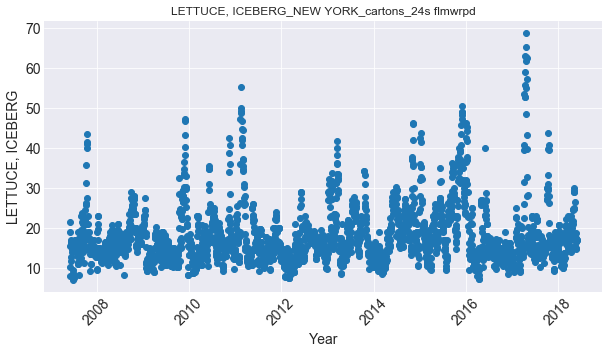

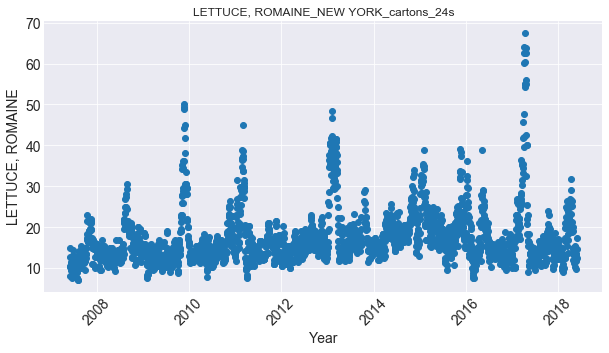

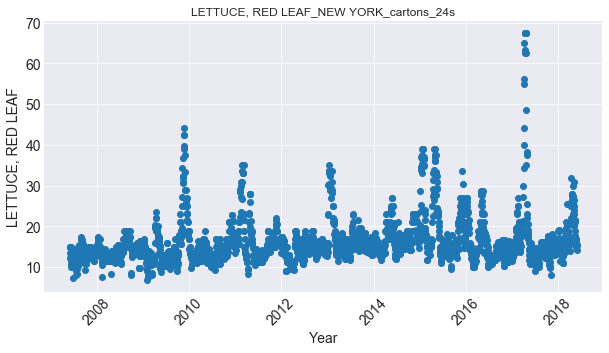

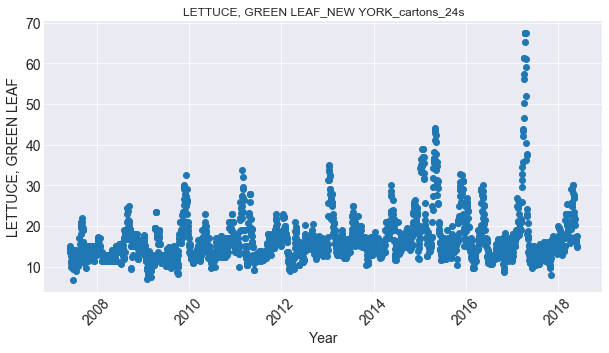

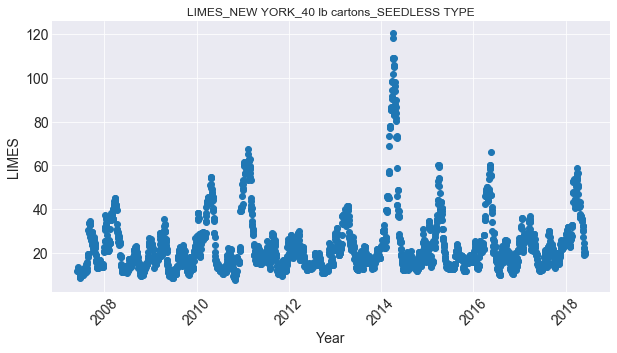

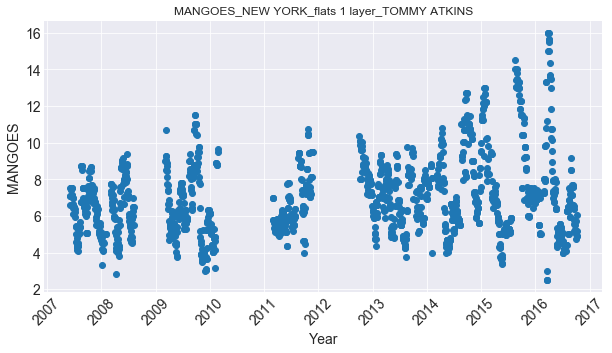

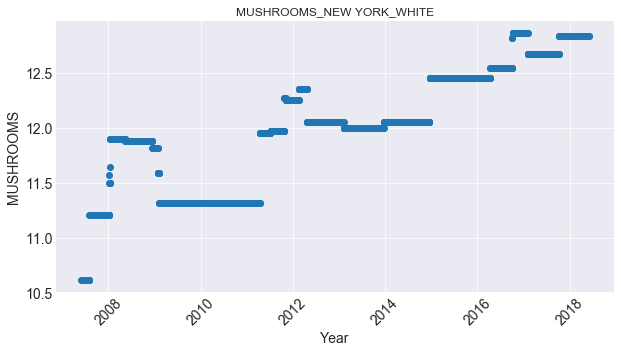

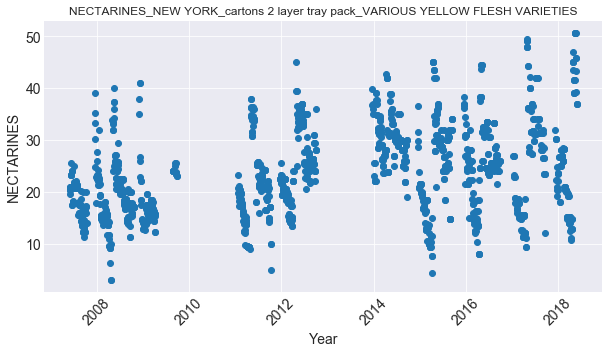

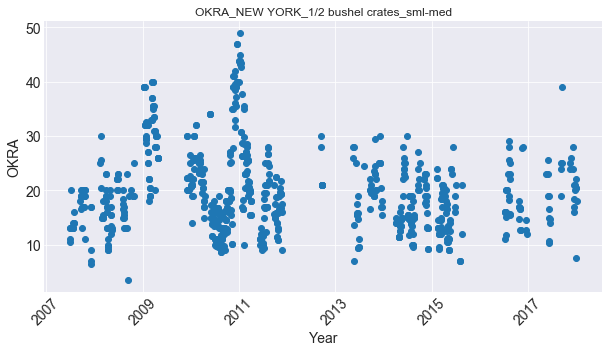

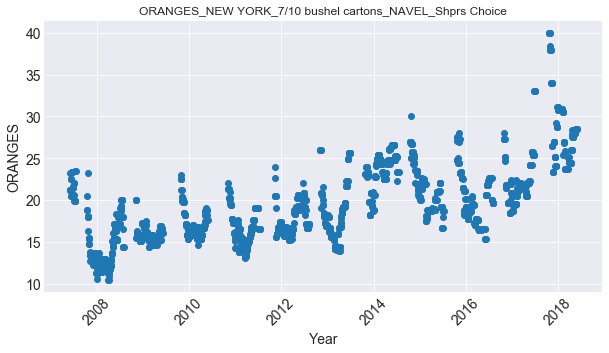

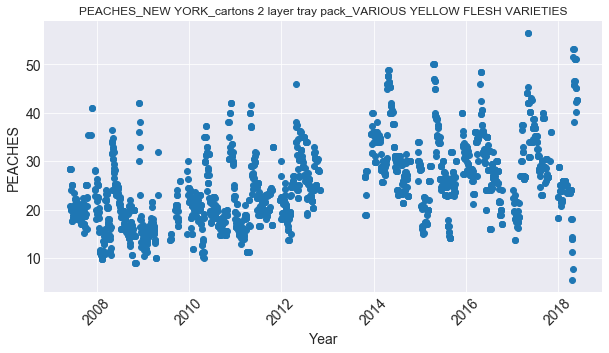

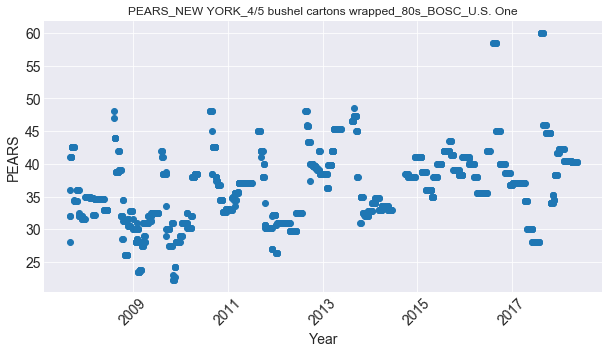

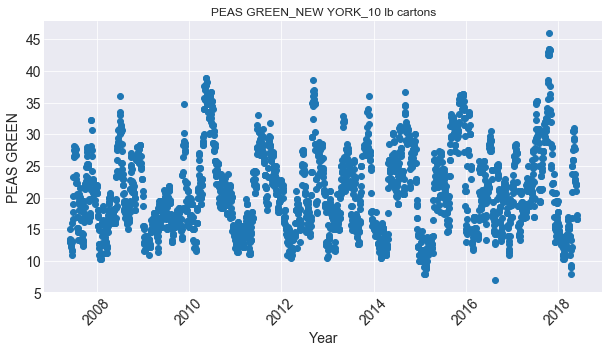

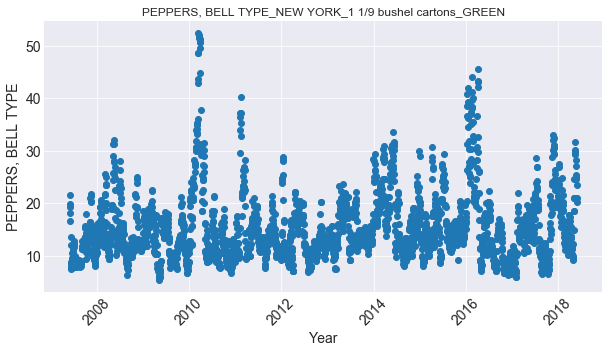

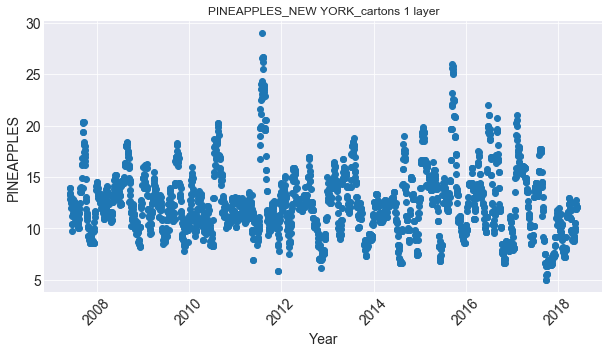

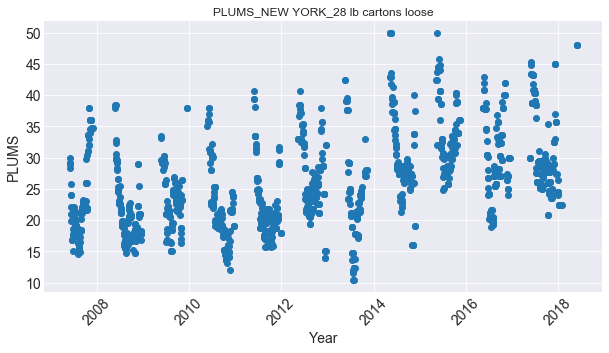

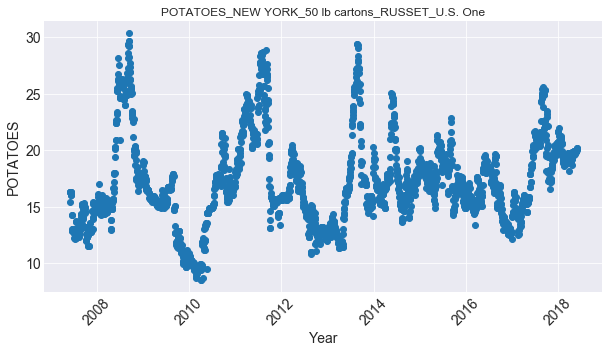

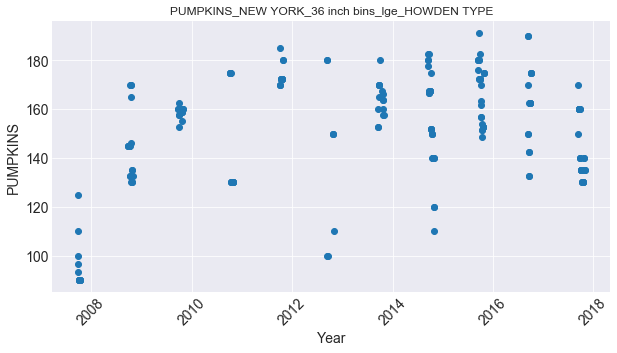

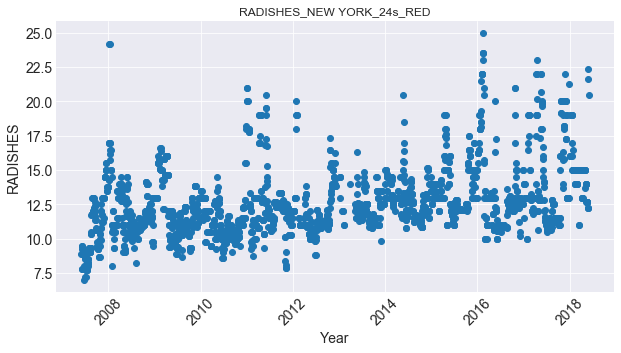

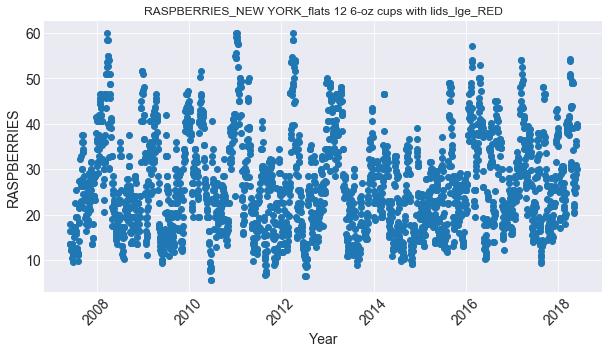

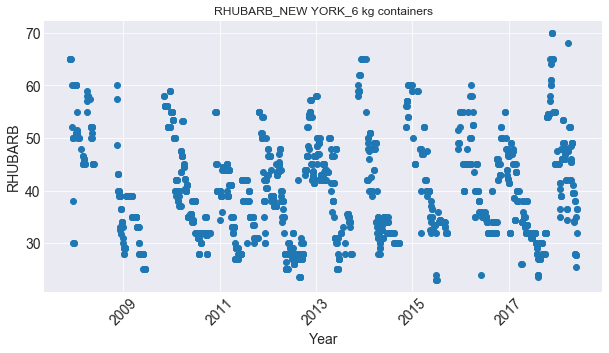

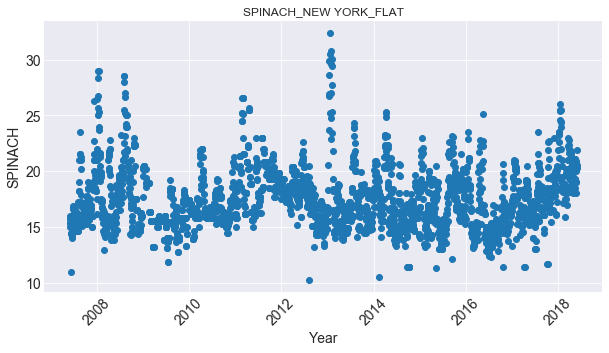

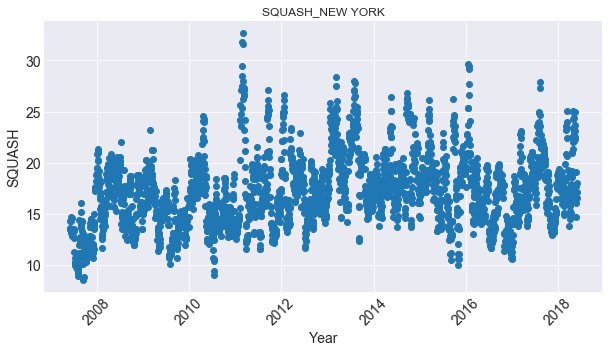

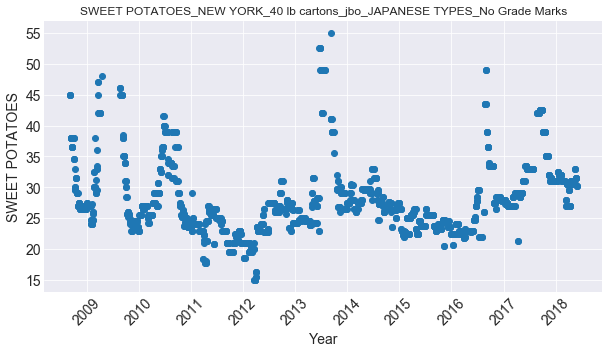

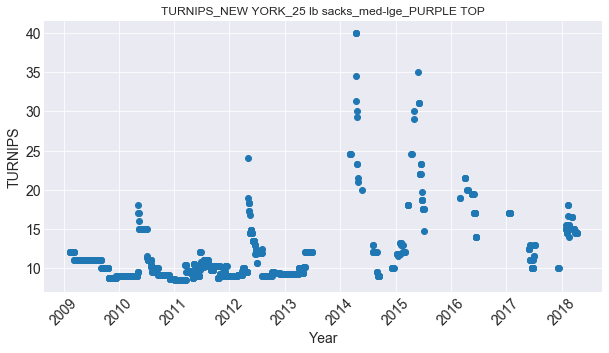

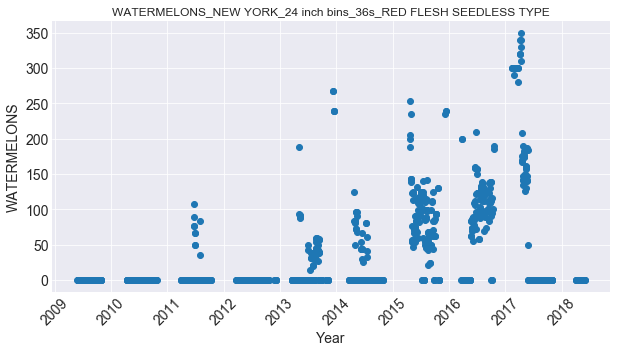

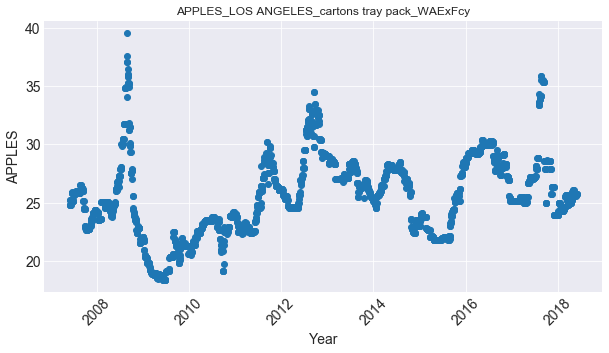

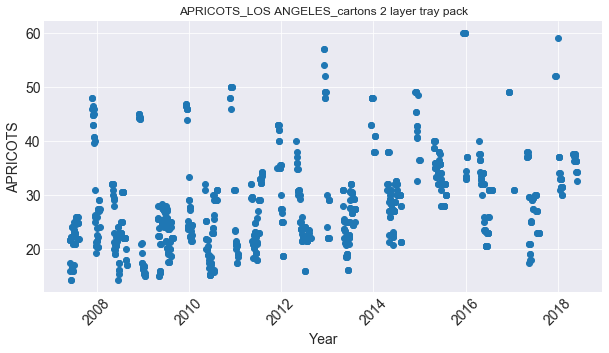

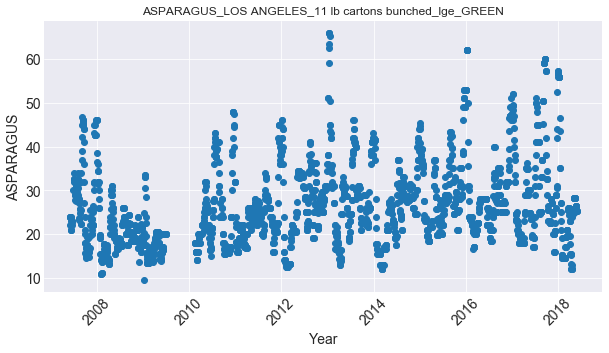

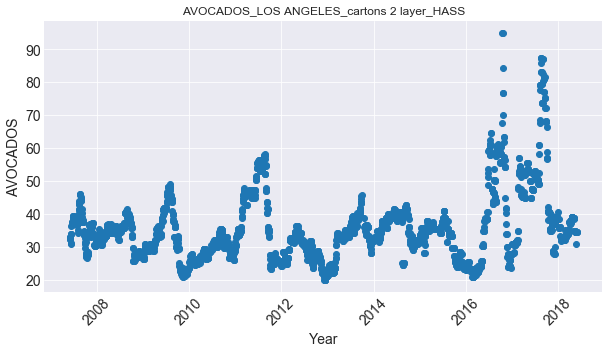

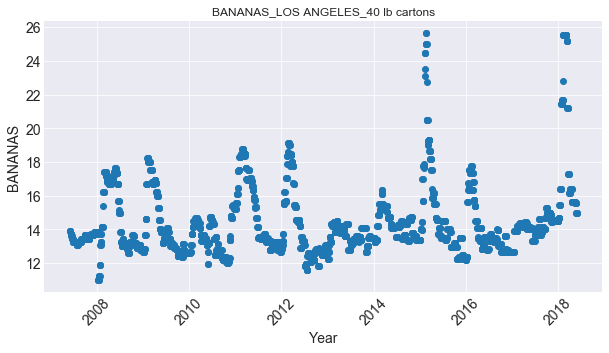

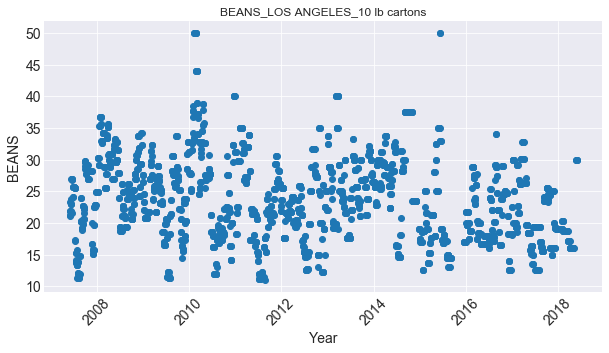

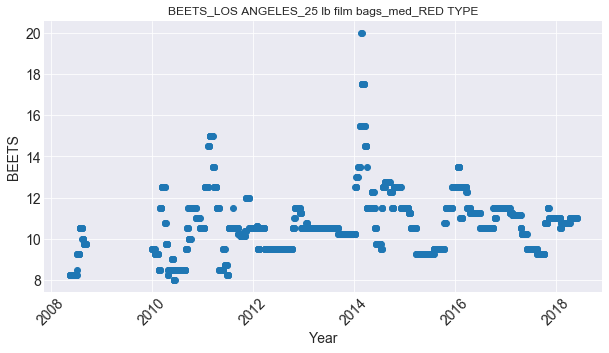

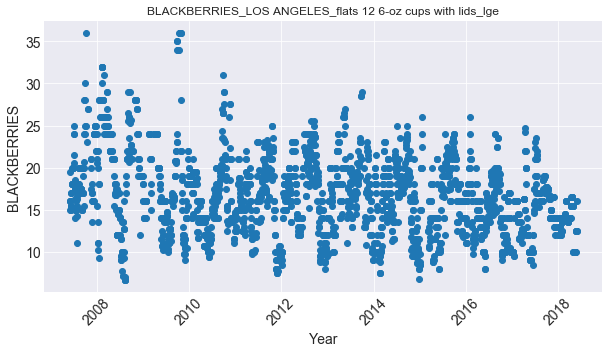

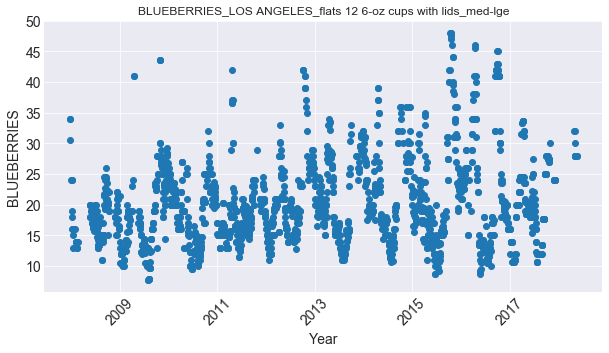

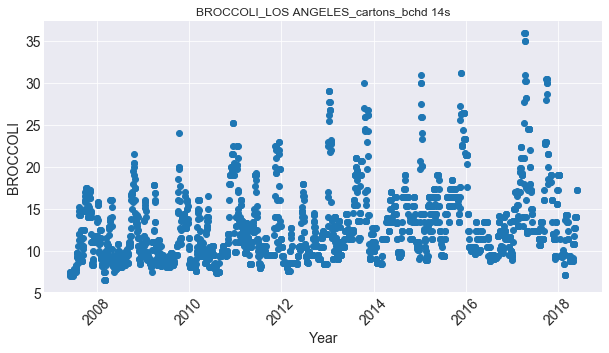

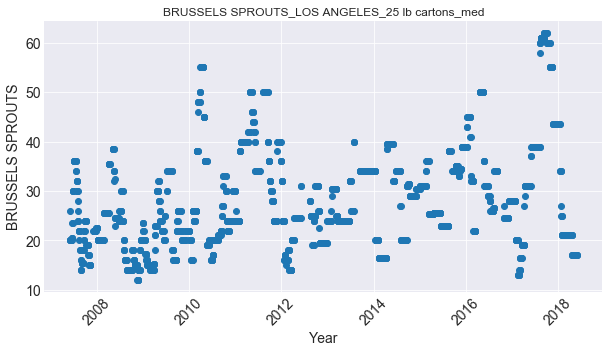

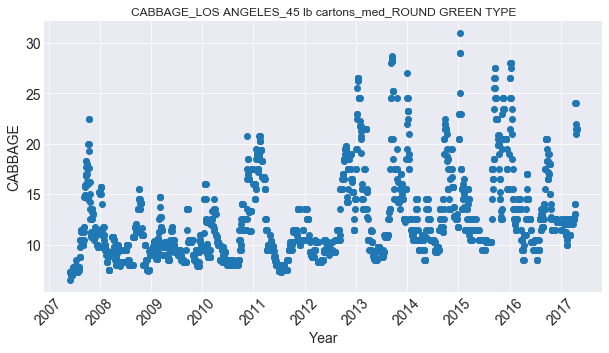

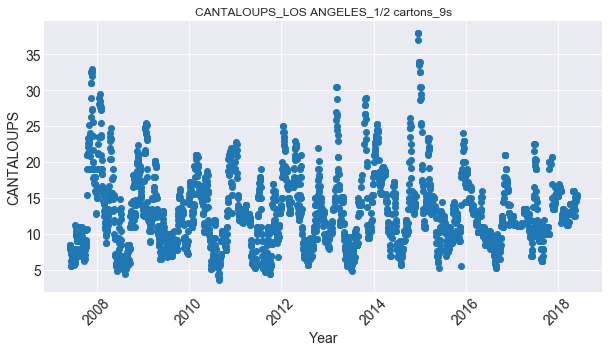

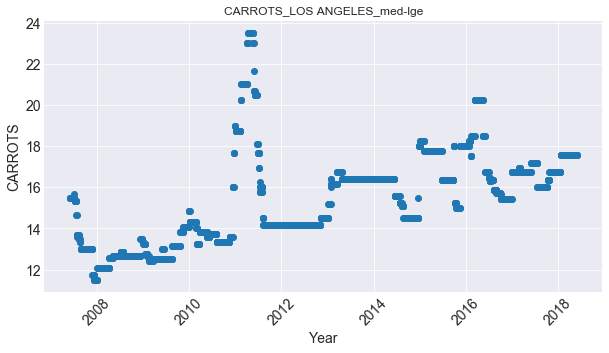

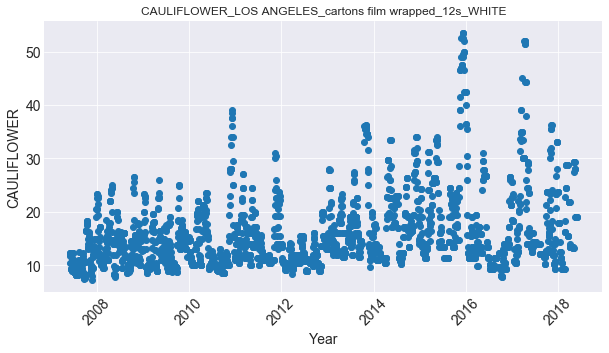

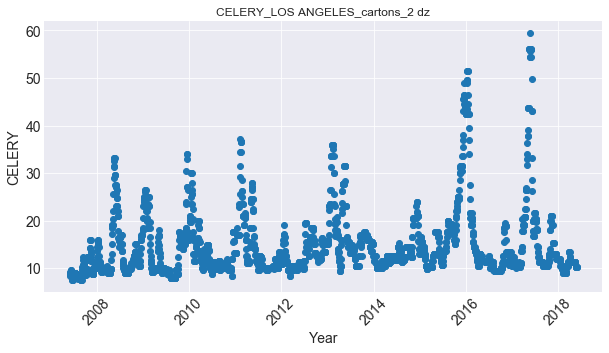

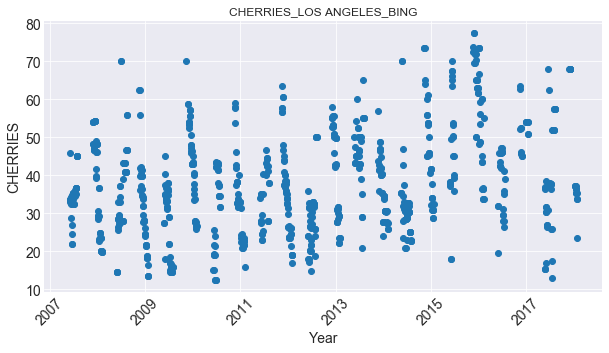

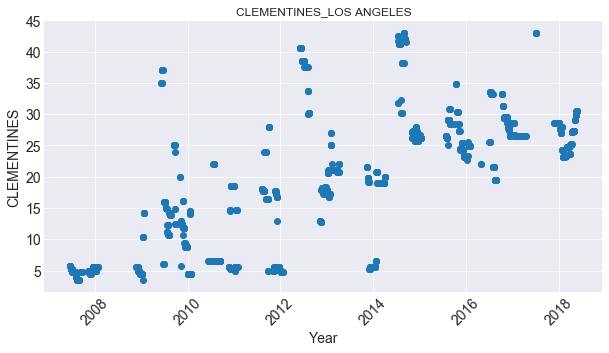

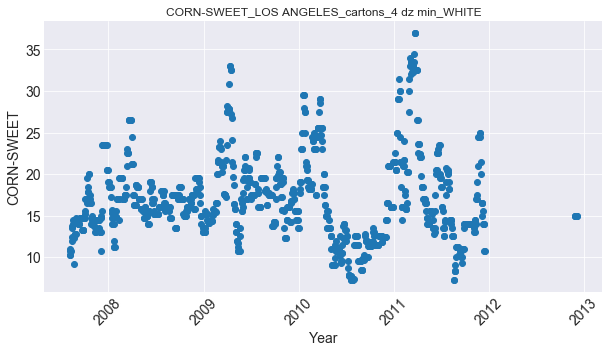

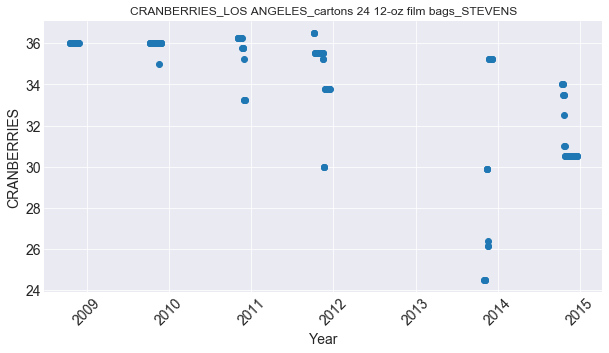

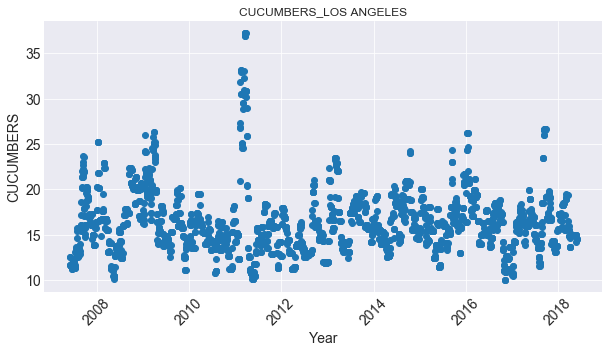

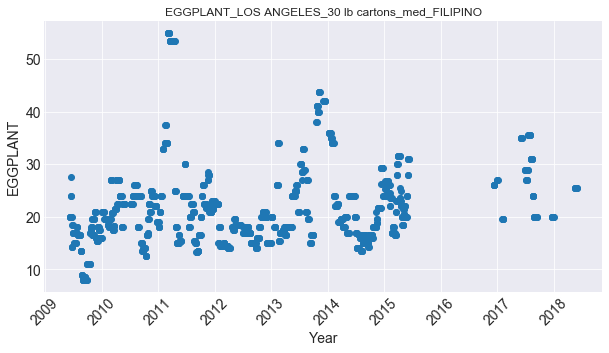

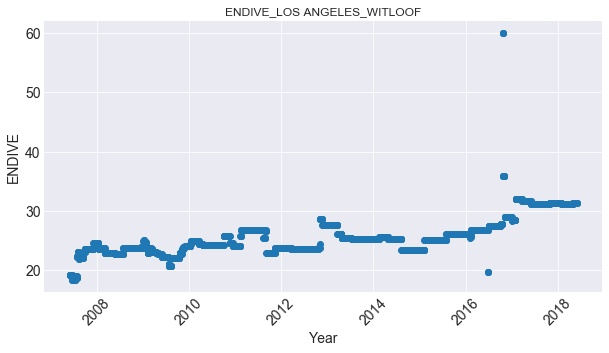

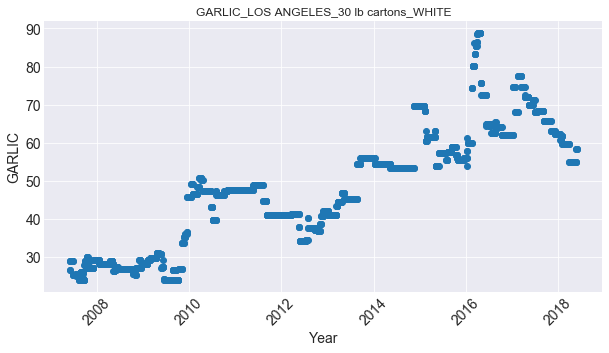

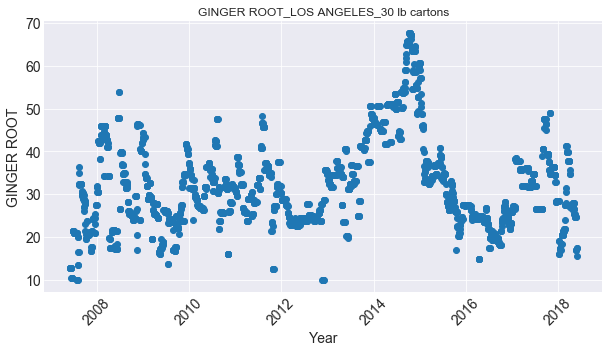

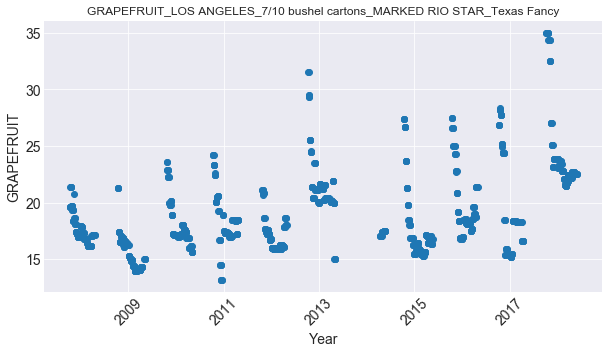

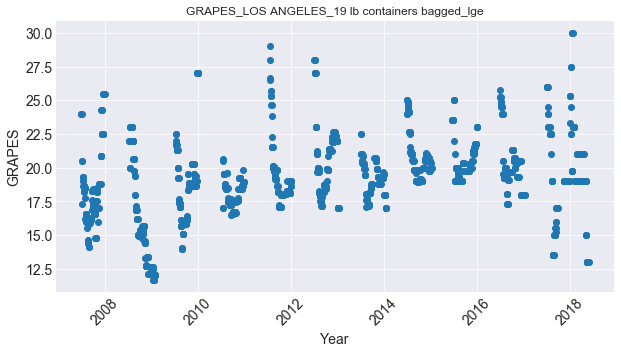

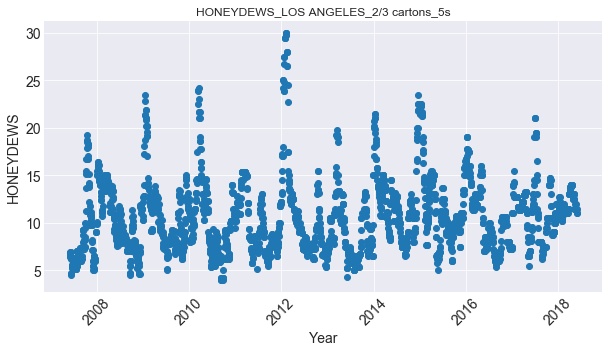

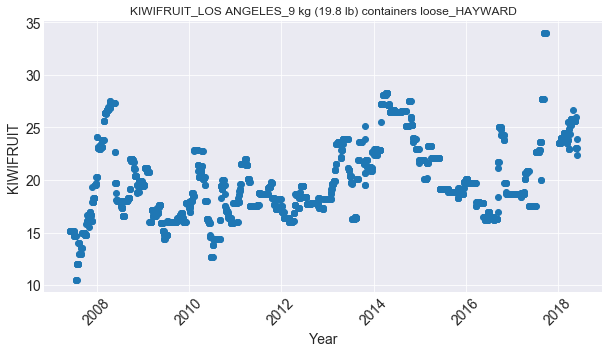

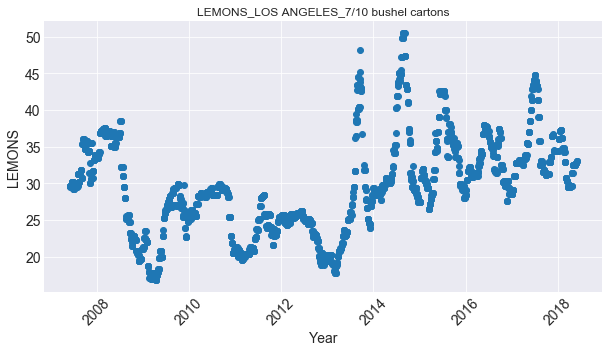

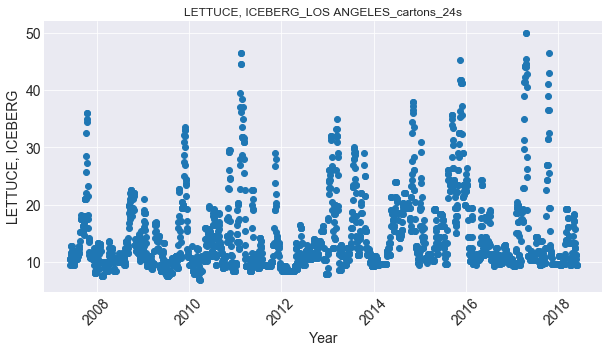

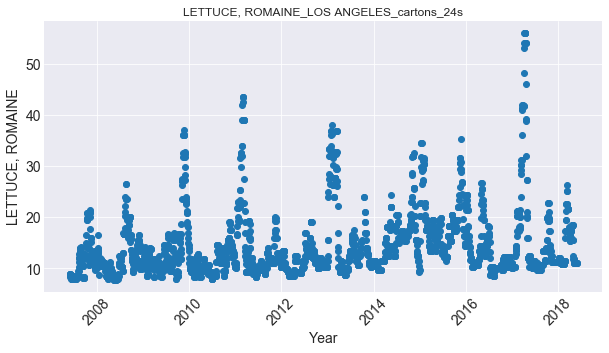

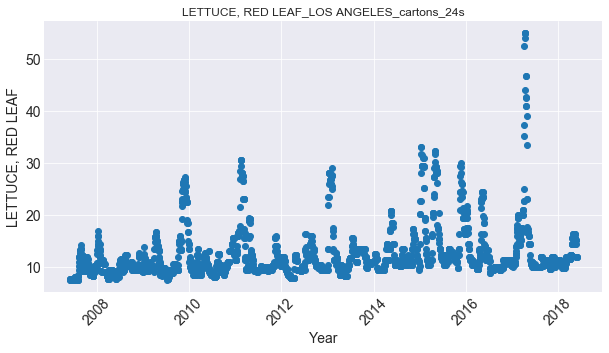

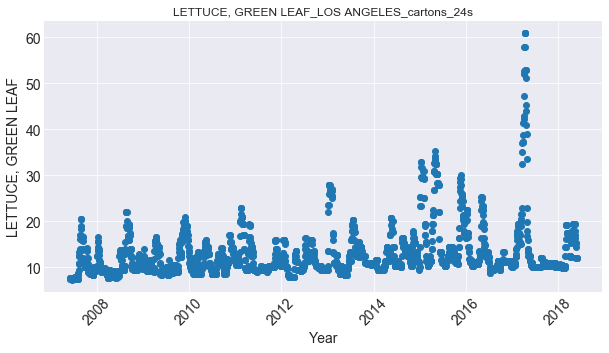

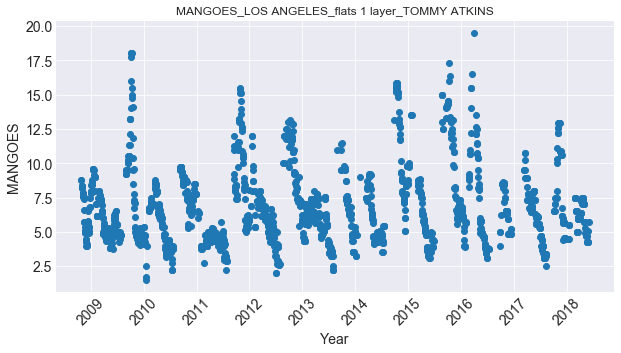

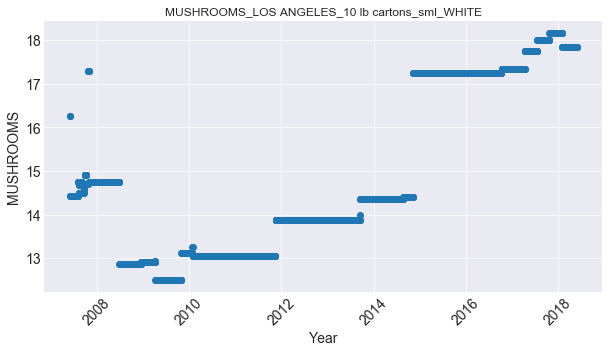

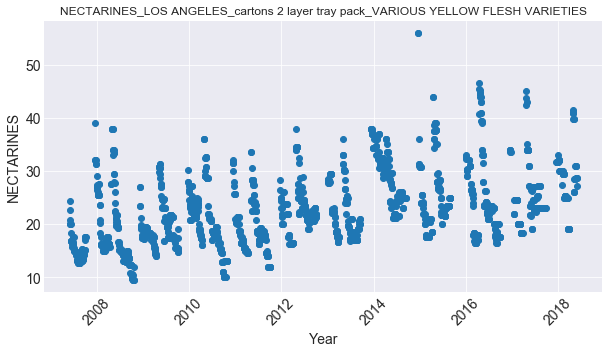

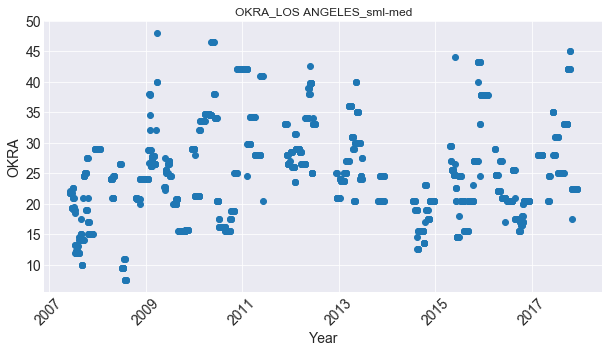

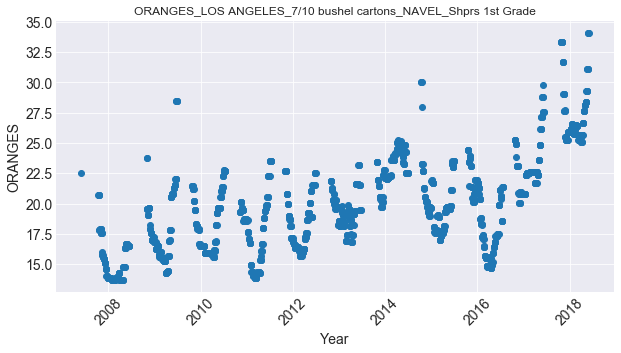

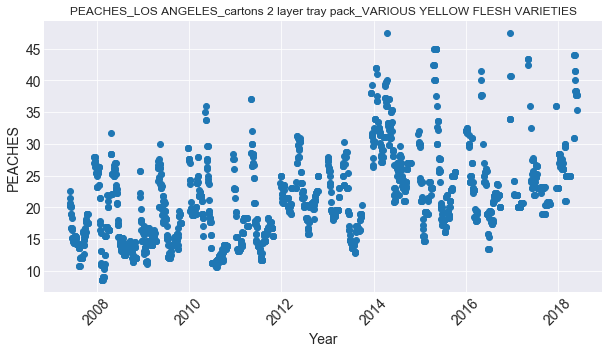

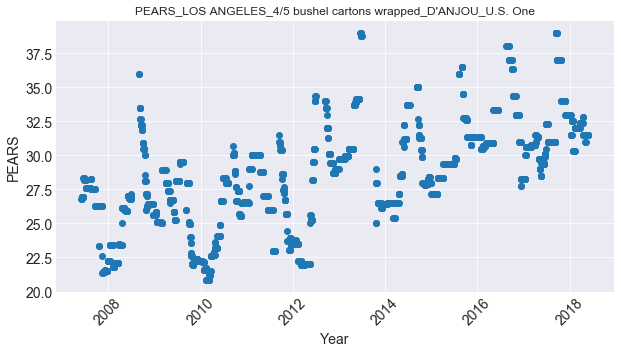

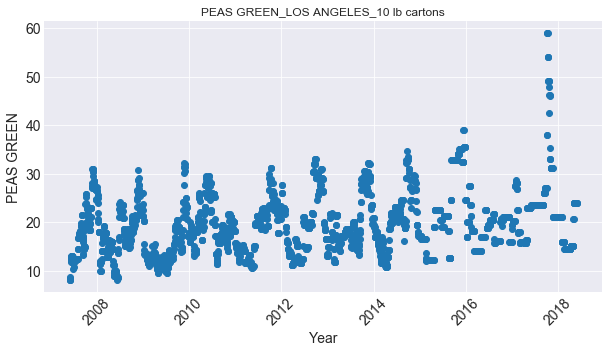

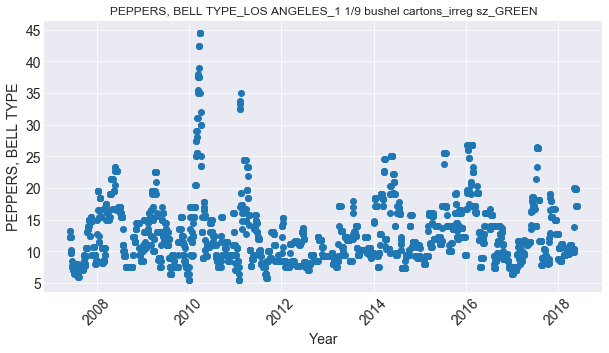

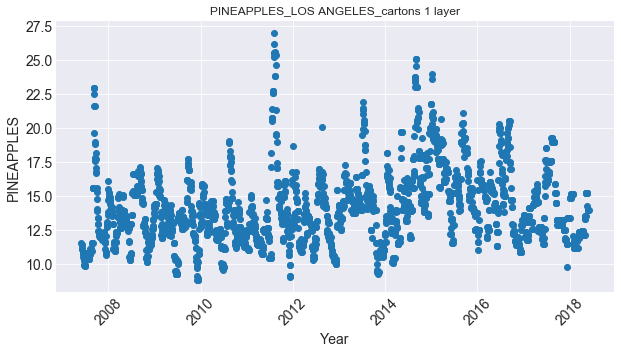

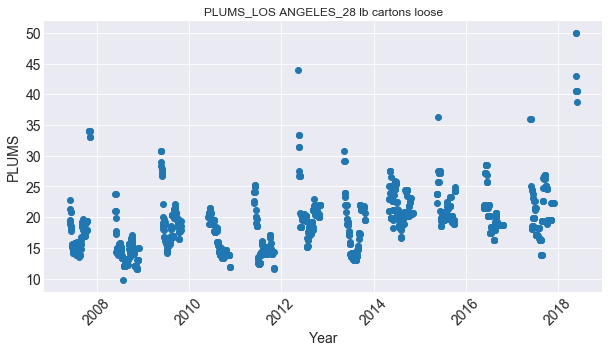

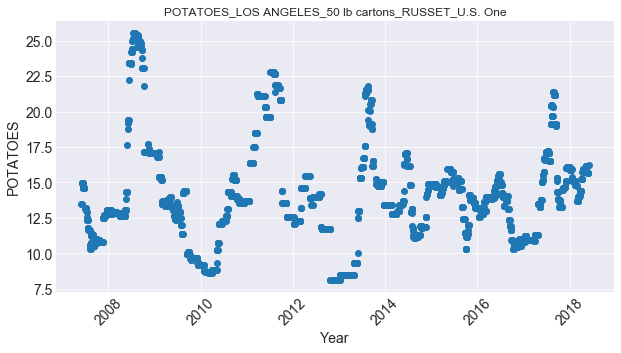

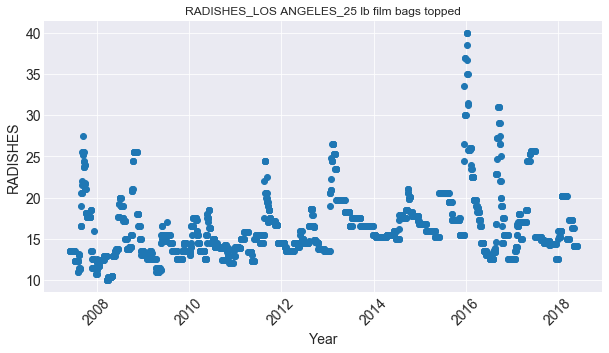

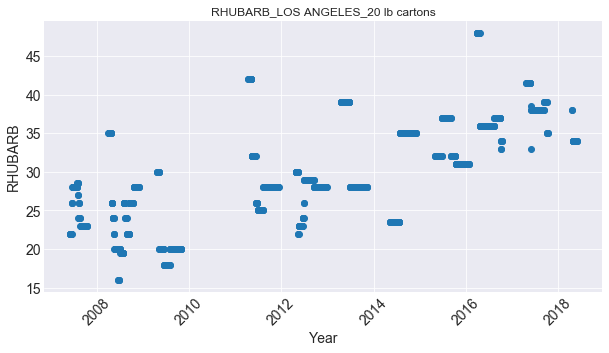

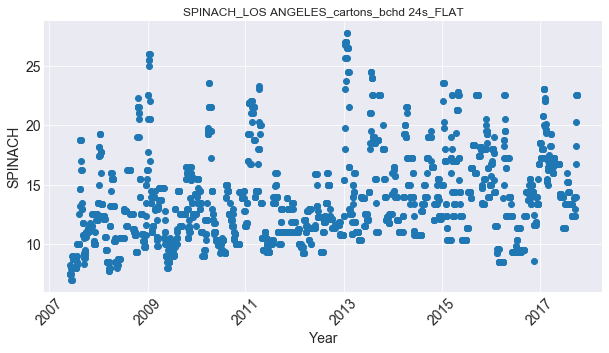

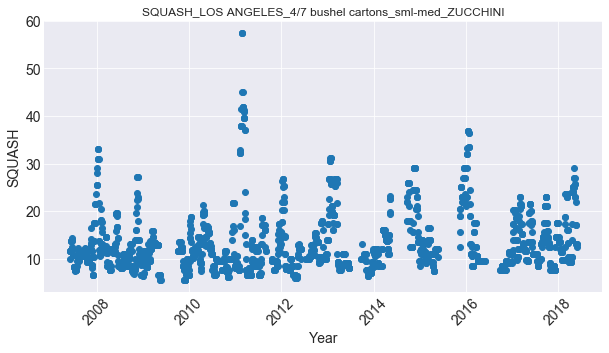

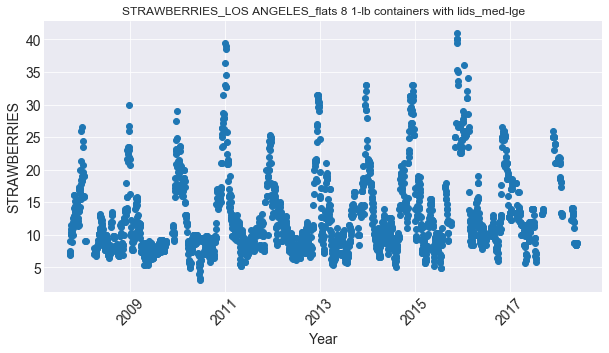

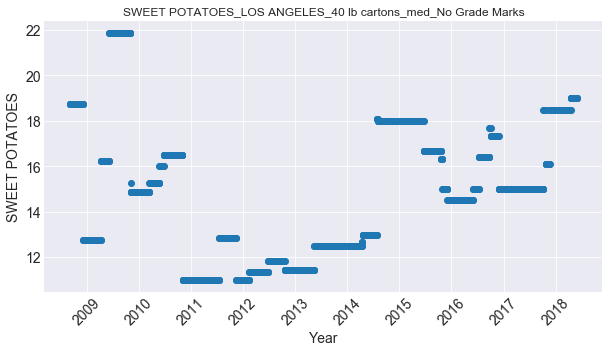

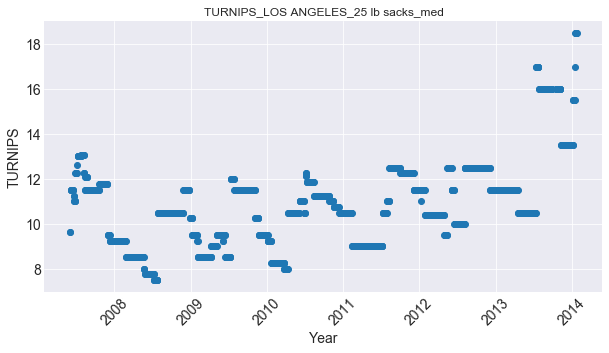

In [19]:
# loop over cities, veg
for c in cities:
    for v in veggies:
        test_data, sortkeys = read_csv_sort(v, c, ['Package', 'Item Size', 'Variety', 'Grade'], 0.3, ['Commodity Name','City Name','Date','Origin'])
        plot_save_produce(test_data, sortkeys)
        test_data.to_csv(save_dir+v+'_'+c+'_TRIM.csv')